<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Wrangling Lab**


Estimated time needed: **45** minutes


In this lab, you will perform data wrangling tasks to prepare raw data for analysis. Data wrangling involves cleaning, transforming, and organizing data into a structured format suitable for analysis. This lab focuses on tasks like identifying inconsistencies, encoding categorical variables, and feature transformation.


## Objectives


After completing this lab, you will be able to:


- Identify and remove inconsistent data entries.

- Encode categorical variables for analysis.

- Handle missing values using multiple imputation strategies.

- Apply feature scaling and transformation techniques.


#### Intsall the required libraries


In [28]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install numpy as np

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 155.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.1/35.1 MB 193.3 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


## Tasks


#### Step 1: Import the necessary module.


### 1. Load the Dataset


<h5>1.1 Import necessary libraries and load the dataset.</h5>


Ensure the dataset is loaded correctly by displaying the first few rows.


In [2]:
# Import necessary libraries
import pandas as pd

# Load the Stack Overflow survey data
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(dataset_url)

# Display the first few rows
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

#### 2. Explore the Dataset


<h5>2.1 Summarize the dataset by displaying the column data types, counts, and missing values.</h5>


In [3]:
# Write your code here
pd.set_option('display.max_columns', None)
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 114 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    ResponseId                      int64  
 1    MainBranch                      object 
 2    Age                             object 
 3    Employment                      object 
 4    RemoteWork                      object 
 5    Check                           object 
 6    CodingActivities                object 
 7    EdLevel                         object 
 8    LearnCode                       object 
 9    LearnCodeOnline                 object 
 10   TechDoc                         object 
 11   YearsCode                       object 
 12   YearsCodePro                    object 
 13   DevType                         object 
 14   OrgSize                         object 
 15   PurchaseInfluence               object 
 16   BuyNewTool                      object 
 17   BuildvsBuy

In [4]:
pd.set_option('display.max_columns', None,'display.max_rows',None)
df.count()


ResponseId                        65437
MainBranch                        65437
Age                               65437
Employment                        65437
RemoteWork                        54806
Check                             65437
CodingActivities                  54466
EdLevel                           60784
LearnCode                         60488
LearnCodeOnline                   49237
TechDoc                           40897
YearsCode                         59869
YearsCodePro                      51610
DevType                           59445
OrgSize                           47480
PurchaseInfluence                 47406
BuyNewTool                        45181
BuildvsBuy                        43358
TechEndorse                       43668
Country                           58930
Currency                          46684
CompTotal                         33740
LanguageHaveWorkedWith            59745
LanguageWantToWorkWith            55752
LanguageAdmired                   50872


In [5]:
df.isnull().sum()

ResponseId                            0
MainBranch                            0
Age                                   0
Employment                            0
RemoteWork                        10631
Check                                 0
CodingActivities                  10971
EdLevel                            4653
LearnCode                          4949
LearnCodeOnline                   16200
TechDoc                           24540
YearsCode                          5568
YearsCodePro                      13827
DevType                            5992
OrgSize                           17957
PurchaseInfluence                 18031
BuyNewTool                        20256
BuildvsBuy                        22079
TechEndorse                       21769
Country                            6507
Currency                          18753
CompTotal                         31697
LanguageHaveWorkedWith             5692
LanguageWantToWorkWith             9685
LanguageAdmired                   14565


<h5>2.2 Generate basic statistics for numerical columns.</h5>


In [6]:
# Write your code here
df.describe()

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65437.000000,3.374000e+04,29658.000000,29324.000000,29393.000000,29411.000000,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,2.343500e+04,29126.000000
mean,32719.000000,2.963841e+145,11.466957,18.581094,7.522140,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,8.615529e+04,6.935041
std,18890.179119,5.444117e+147,9.168709,25.966221,18.422661,21.833836,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,1.867570e+05,2.088259
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16360.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.000000
50%,32719.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000
75%,49078.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,1.079715e+05,8.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


### 3. Identifying and Removing Inconsistencies


<h5>3.1 Identify inconsistent or irrelevant entries in specific columns (e.g., Country).</h5>


In [7]:
# Write your code here
df['Country'].unique()

array(['United States of America',
       'United Kingdom of Great Britain and Northern Ireland', 'Canada',
       'Norway', 'Uzbekistan', 'Serbia', 'Poland', 'Philippines',
       'Bulgaria', 'Switzerland', 'India', 'Germany', 'Ireland', 'Italy',
       'Ukraine', 'Australia', 'Brazil', 'Japan', 'Austria',
       'Iran, Islamic Republic of...', 'France', 'Saudi Arabia',
       'Romania', 'Turkey', 'Nepal', 'Algeria', 'Sweden', 'Netherlands',
       'Croatia', 'Pakistan', 'Czech Republic',
       'Republic of North Macedonia', 'Finland', 'Slovakia',
       'Russian Federation', 'Greece', 'Israel', 'Belgium', 'Mexico',
       'United Republic of Tanzania', 'Hungary', 'Argentina', 'Portugal',
       'Sri Lanka', 'Latvia', 'China', 'Singapore', 'Lebanon', 'Spain',
       'South Africa', 'Lithuania', 'Viet Nam', 'Dominican Republic',
       'Indonesia', 'Kosovo', 'Morocco', 'Taiwan', 'Georgia',
       'San Marino', 'Tunisia', 'Bangladesh', 'Nigeria', 'Liechtenstein',
       'Denmark', 'Ecu

In [8]:
df['Country'].value_counts()


Country
United States of America                                11095
Germany                                                  4947
India                                                    4231
United Kingdom of Great Britain and Northern Ireland     3224
Ukraine                                                  2672
France                                                   2110
Canada                                                   2104
Poland                                                   1534
Netherlands                                              1449
Brazil                                                   1375
Italy                                                    1341
Australia                                                1260
Spain                                                    1123
Sweden                                                   1016
Russian Federation                                        925
Switzerland                                               876


<h5>3.2 Standardize entries in columns like Country or EdLevel by mapping inconsistent values to a consistent format.</h5>


In [9]:
## Write your code here
df.loc['Country'] = df['Country'].str.strip().str.lower()
df.loc['EdLevel'] = df['EdLevel'].str.strip()

### 4. Encoding Categorical Variables


<h5>4.1 Encode the Employment column using one-hot encoding.</h5>


In [10]:
# Assuming df is your DataFrame and 'Employment' is the categorical column
employment_encoded = pd.get_dummies(df['Employment'], prefix='Employment')
# Concatenate the original DataFrame with the new one-hot encoded DataFrame
df = pd.concat([df.drop('Employment', axis=1), employment_encoded], axis=1)

### 5. Handling Missing Values


<h5>5.1 Identify columns with the highest number of missing values.</h5>


In [ ]:
## Write your code here
missing=df.isna().sum()
df_miss=pd.DataFrame(missing).reset_index()
df_miss.columns=['column_name','missing_value']
df_miss.loc[df_miss['missing_value'].idxmax()]
df.drop('AINextMuch less integrated', axis=1, inplace=True)

<h5>5.2 Impute missing values in numerical columns (e.g., `ConvertedCompYearly`) with the mean or median.</h5>


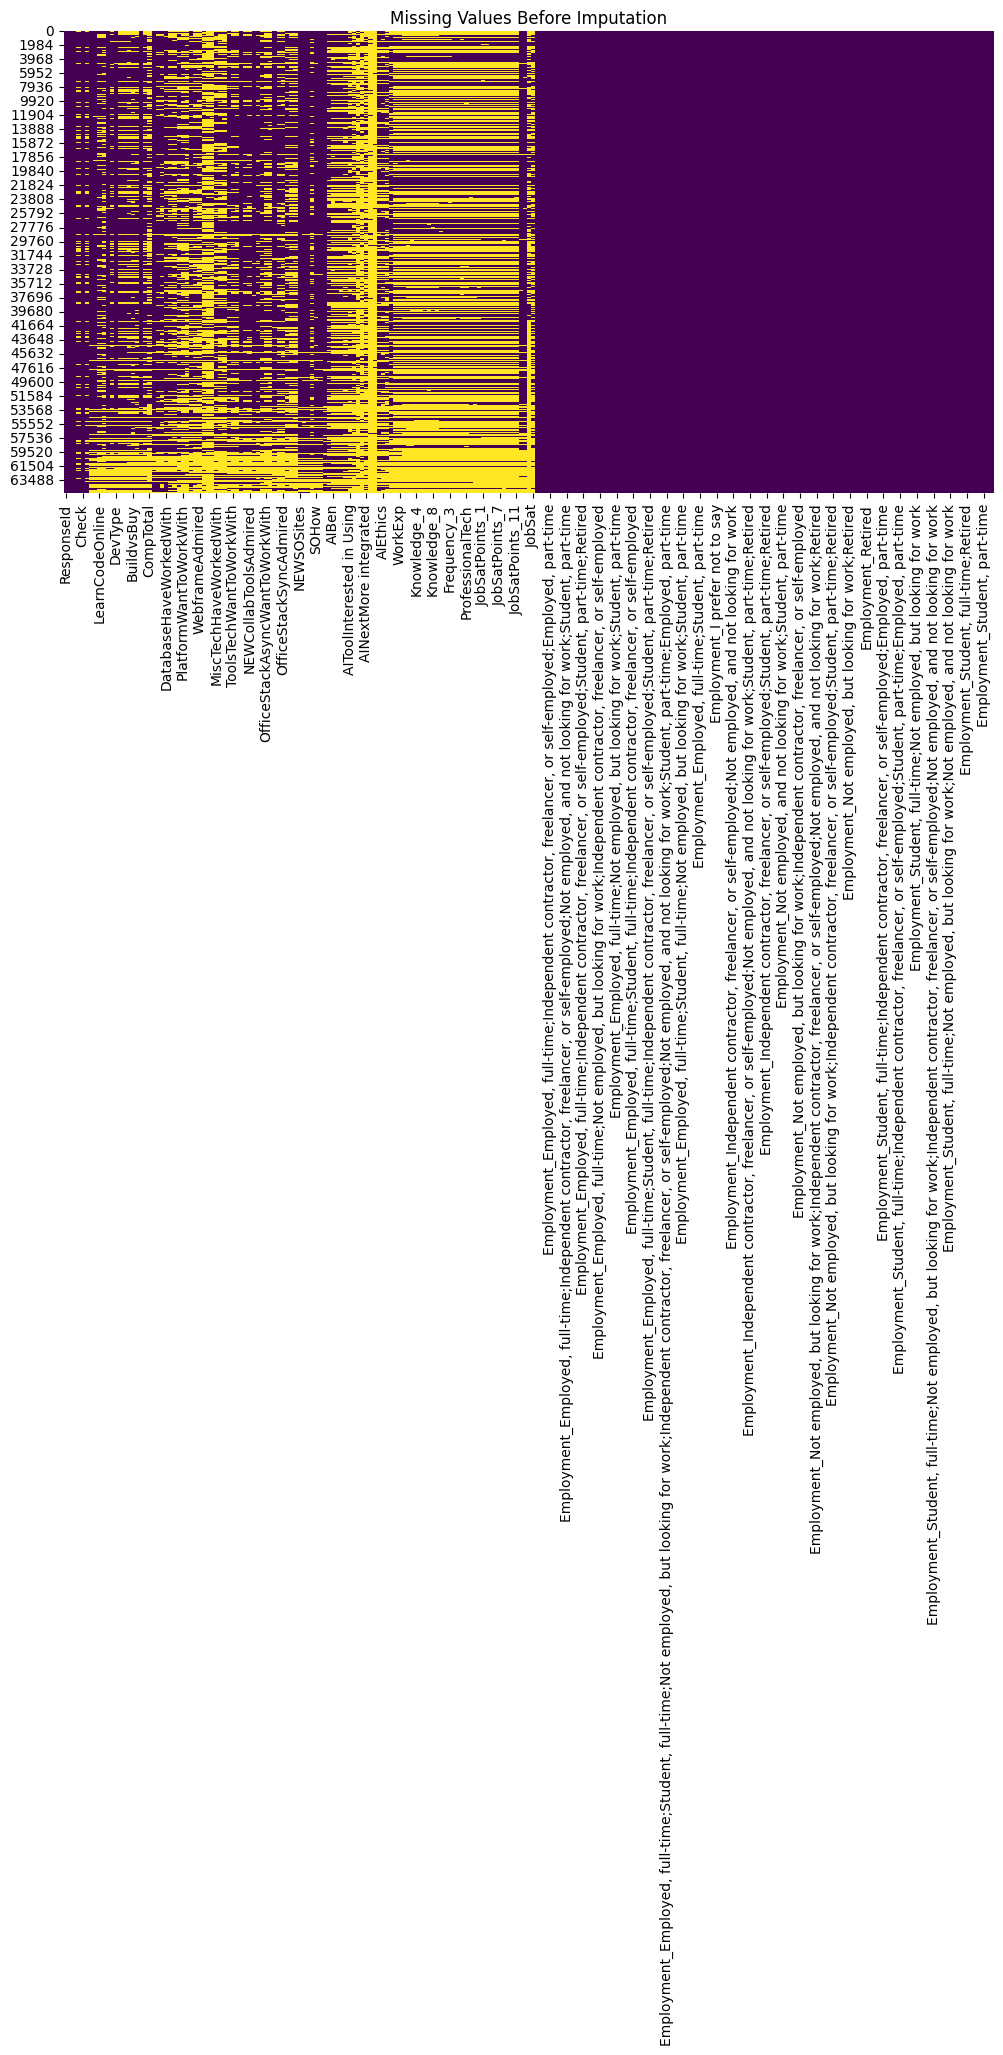

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap to show missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Before Imputation')
plt.show()

In [30]:
# Clip to 1st and 99th percentiles
for col in df.select_dtypes(include='number'):
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df[col] = df[col].clip(lower, upper)

In [31]:
for col in df.select_dtypes(include='number').columns:
    if df[col].skew() > 1:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mean())

/opt/conda/lib/python3.12/site-packages/pandas/core/nanops.py:1260: RuntimeWarning: overflow encountered in multiply
  adjusted3 = adjusted2 * adjusted
/opt/conda/lib/python3.12/site-packages/numpy/_core/_methods.py:51: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/opt/conda/lib/python3.12/site-packages/pandas/core/nanops.py:1272: RuntimeWarning: overflow encountered in scalar power
  result = (count * (count - 1) ** 0.5 / (count - 2)) * (m3 / m2**1.5)


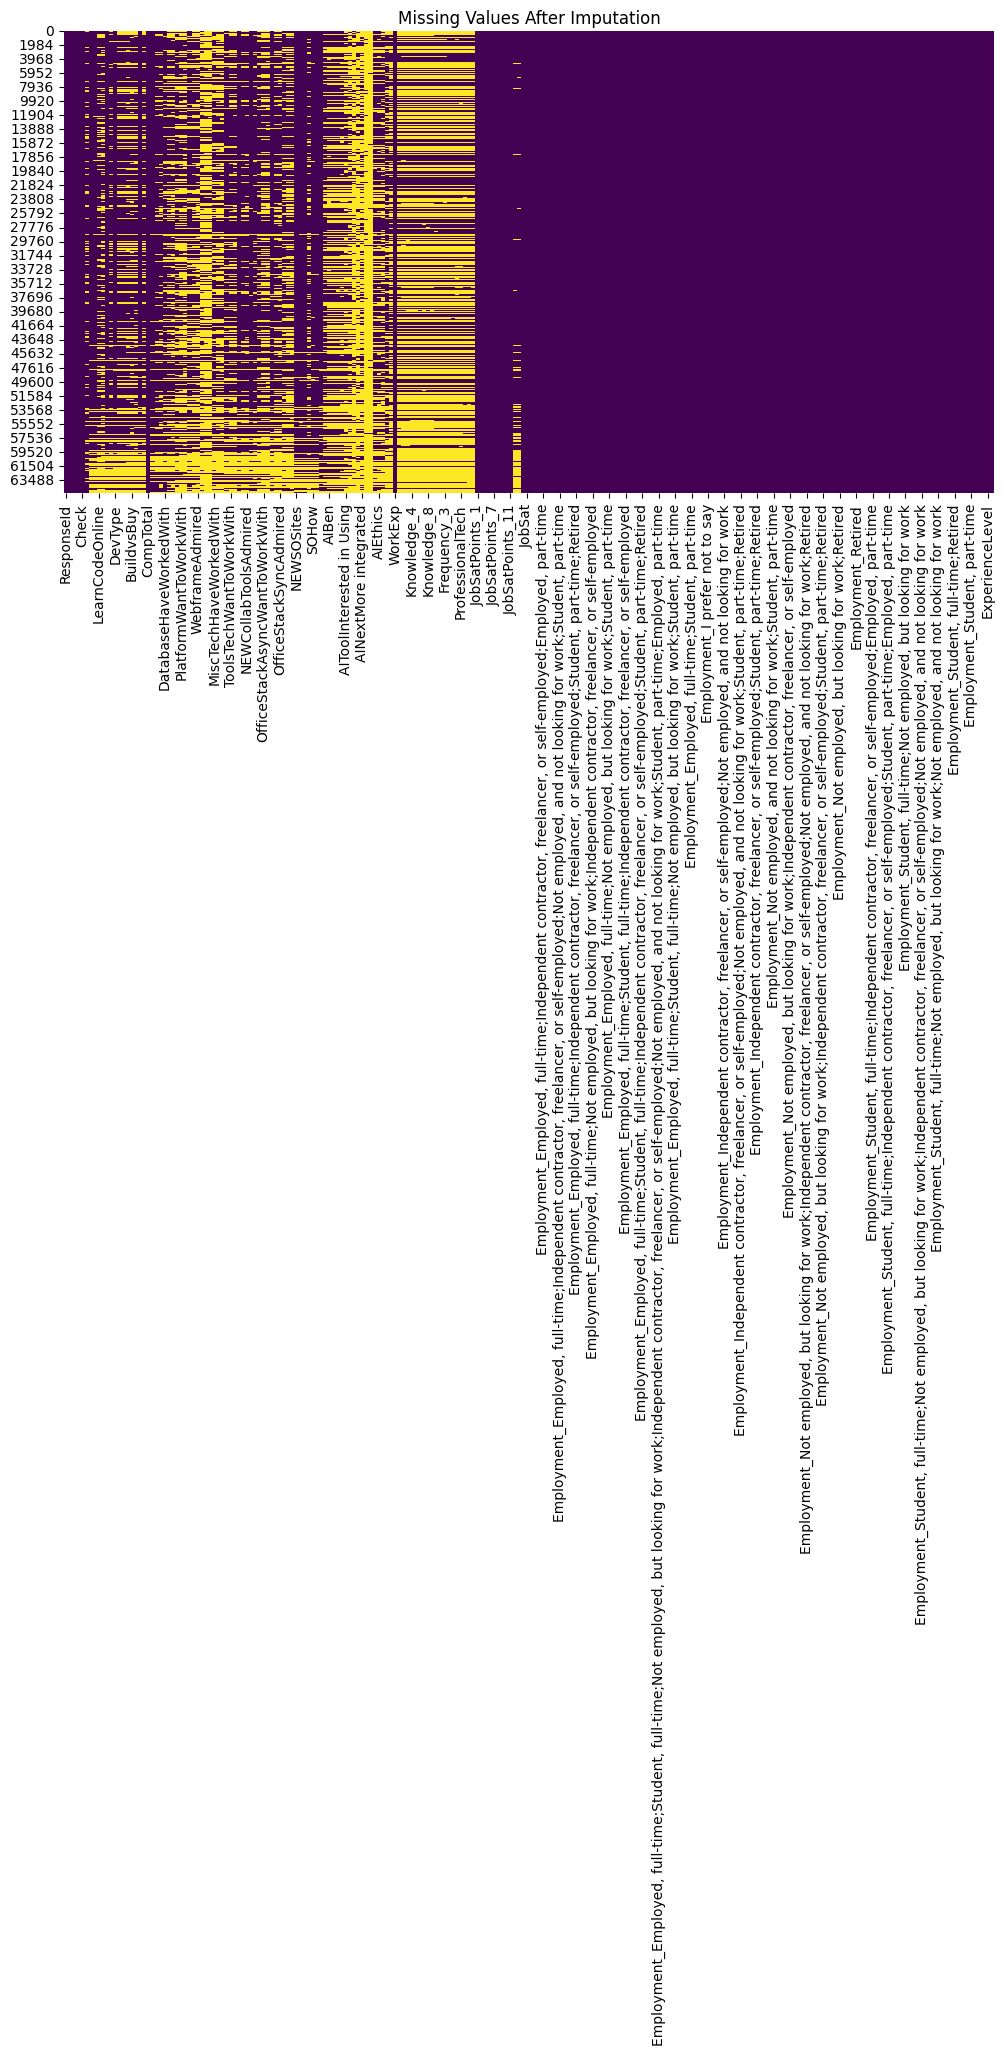

In [32]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values After Imputation')
plt.show()

<h5>5.3 Impute missing values in categorical columns (e.g., `RemoteWork`) with the most frequent value.</h5>


In [15]:
## Write your code here
df['RemoteWork'] = df['RemoteWork'].fillna(df['RemoteWork'].mode()[0])

### 6. Feature Scaling and Transformation


<h5>6.1 Apply Min-Max Scaling to normalize the `ConvertedCompYearly` column.</h5>


In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['ConvertedCompYearly_Normalized'] = scaler.fit_transform(df[['ConvertedCompYearly']])


<h5>6.2 Log-transform the ConvertedCompYearly column to reduce skewness.</h5>


In [24]:
df['ConvertedCompYearly_Log'] = np.log1p(df['ConvertedCompYearly'])

### 7. Feature Engineering


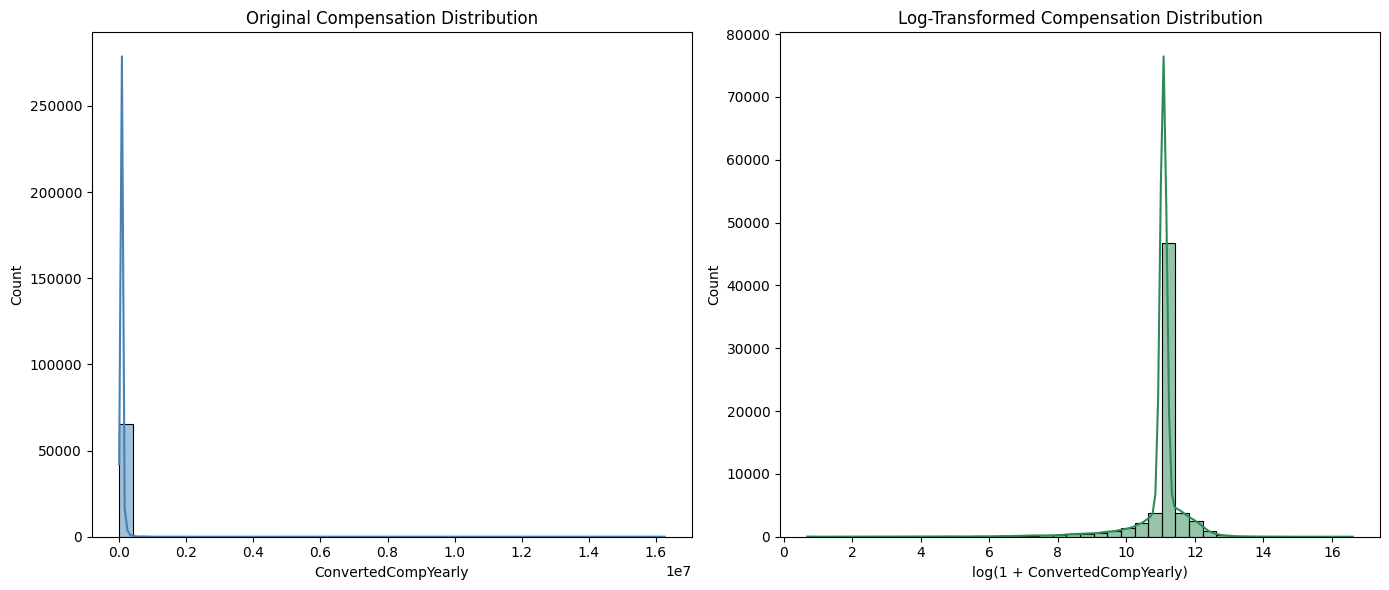

In [20]:
## Write your code here
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a new column with log1p transformation if you haven't already
df['ConvertedCompYearly_Log'] = np.log1p(df['ConvertedCompYearly'])

# Plot side-by-side histograms
plt.figure(figsize=(14, 6))

# Original distribution
plt.subplot(1, 2, 1)
sns.histplot(df['ConvertedCompYearly'], kde=True, bins=40, color='steelblue')
plt.title('Original Compensation Distribution')
plt.xlabel('ConvertedCompYearly')

# Log-transformed distribution
plt.subplot(1, 2, 2)
sns.histplot(df['ConvertedCompYearly_Log'], kde=True, bins=40, color='seagreen')
plt.title('Log-Transformed Compensation Distribution')
plt.xlabel('log(1 + ConvertedCompYearly)')

plt.tight_layout()
plt.show()


<h5>7.1 Create a new column `ExperienceLevel` based on the `YearsCodePro` column:</h5>


In [21]:
def map_experience_level(years):
    try:
        years = float(years)
    except:
        return 'Unknown'

    if years < 2:
        return 'Beginner'
    elif years < 5:
        return 'Intermediate'
    elif years < 10:
        return 'Advanced'
    else:
        return 'Expert'

# Apply the function to create new column
df['ExperienceLevel'] = df['YearsCodePro'].apply(map_experience_level)

### Summary


In this lab, you:

- Explored the dataset to identify inconsistencies and missing values.

- Encoded categorical variables for analysis.

- Handled missing values using imputation techniques.

- Normalized and transformed numerical data to prepare it for analysis.

- Engineered a new feature to enhance data interpretation.


Copyright © IBM Corporation. All rights reserved.
